In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# 保存随机生成的序列
np.random.seed(200)
k = 3
centroids = {
    i+1:[np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}




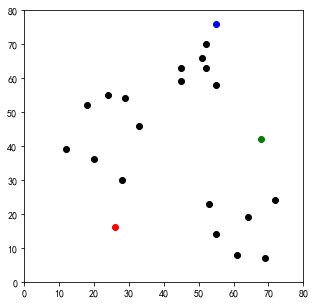

In [3]:
fig = plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [4]:
## 聚类分配至对应的簇
def arrangement(data, centroids):
    for i in centroids.keys():
        # 计算剩下的点与第一选定的点的欧式距离
        # 按照欧式距离进行划分
        data['distance_from_{}'.format(i)] = (
        # 计算欧式距离 sqrt(x**2+y**2) 
        np.sqrt(
            (data['x'] - centroids[i][0])**2
            + (data['y']- centroids[i][0])**2
        )
    )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i \
                               in centroids.keys()]
    # idxmin()用于计算最短距离, 并返回对应的索引
    data['closest'] = data.loc[:, centroids_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color'] = data['closest'].map(lambda x: colmap[x])
    return data


In [5]:
data.head()

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [6]:
distance_data = arrangement(data, centroids)

In [8]:
distance_data

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,19.104973,63.063460,45.880279,1,r
1,20,36,11.661904,57.688820,39.824616,1,r
2,28,30,4.472136,55.172457,36.796739,1,r
3,18,52,27.202941,52.497619,37.121422,1,r
4,29,54,28.160256,41.436699,26.019224,3,b
5,33,46,21.189620,41.340053,23.769729,1,r
6,24,55,29.068884,45.880279,31.000000,1,r
7,45,59,38.078866,24.698178,10.770330,3,b
8,45,63,41.593269,23.537205,12.806248,3,b
9,52,70,51.107729,16.124515,15.297059,3,b


In [10]:
test_data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [15]:
test_data

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [23]:
test_data['closest'] = test_data.loc[:,['y','x']].idxmin(axis=1)

In [24]:
test_data

,x,y,closest
0,12,39,x
1,20,36,x
2,28,30,x
3,18,52,x
4,29,54,x
5,33,46,x
6,24,55,x
7,45,59,x
8,45,63,x
9,52,70,x


In [25]:
distance_data.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,19.104973,63.063460,45.880279,1,r
1,20,36,11.661904,57.688820,39.824616,1,r
2,28,30,4.472136,55.172457,36.796739,1,r
3,18,52,27.202941,52.497619,37.121422,1,r
4,29,54,28.160256,41.436699,26.019224,3,b


Text(0.5, 1.0, '第一次分类图')

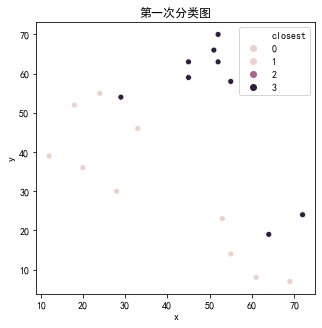

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='x', y='y', hue='closest', data=distance_data, ax=ax )
plt.title('第一次分类图')

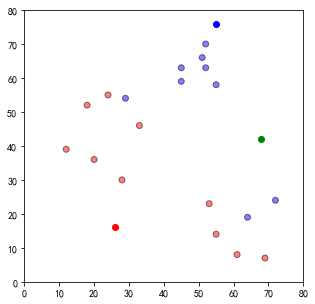

In [10]:
# sns绘制不明显 使用plt进行绘制
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 重新选择中心点

In [11]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['x'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['y'])
    return k

centroids = update(centroids)


In [12]:
centroids

{1: [37.3, 31.0], 2: [nan, nan], 3: [51.666666666666664, 52.888888888888886]}

In [13]:
old_centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

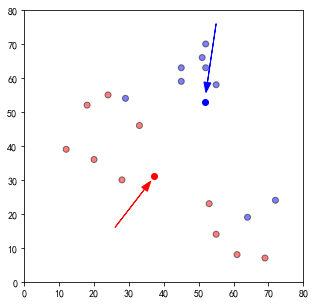

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

## 重新进行划分

In [15]:
distance_data_sec = arrangement(distance_data, centroids)

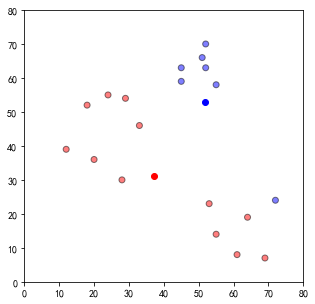

In [18]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 如此循环，直到中心点不再改变

In [20]:
while True:
    closet_cetroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    data = arrangement(data ,centroids)
    # 若将其余重新划分的簇不再改变，则循环结束
    if closet_cetroids.equals(data['closest']):
        break

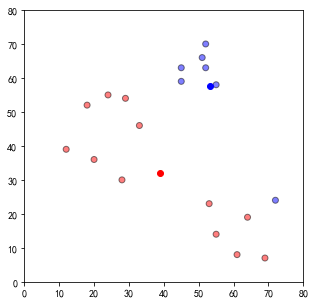

In [23]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 使用sklearn集成的kmeans进行验证

In [76]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 使用make_blobs生成数据
# X 样本数据
# y 样本数据的标签
# n_samples 生成样本的数量
# n_feature 需要的特征个数
# 要生成的样本中心（类别）数，或者是确定的中心点
# 每个类别的方差，例如我们希望生成2类数据，
# 其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。

X, y = make_blobs(n_samples=19,
                  n_features=2,
                  centers=3,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)


In [77]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
print("kmeans k={}, cost={}".format(n_clusters, int(kmeans.score(X))))

kmeans k=3, cost=-21


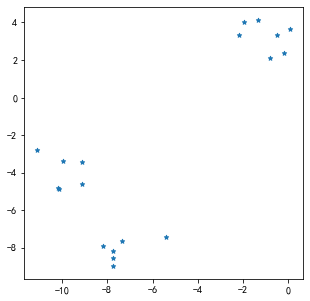

In [78]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1],s=20, marker='*')

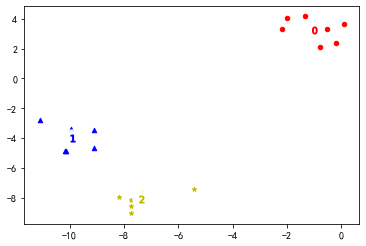

In [79]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']

plt.figure(figsize=(6,4))
# 画样本
for c in range(n_clusters):
    # 将每个点对应的簇进行归类
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

In [75]:
data.shape

(19, 7)